In [19]:
import os
import pickle
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
plt.rcParams['figure.dpi'] = 600
plt.rcParams['savefig.dpi'] = 600
from collections import OrderedDict

In [10]:
with open("./syn_refine_loss_5", "rb") as f:
    loss_5 = pickle.load(f)

with open("./syn_refine_loss_10", "rb") as f:
    loss_10 = pickle.load(f)

with open("./syn_refine_loss_20", "rb") as f:
    loss_20 = pickle.load(f)
    
with open("./syn_refine_loss_50", "rb") as f:
    loss_50 = pickle.load(f)

In [4]:
loss_5

[array([29.57447306, 26.4026591 , 35.19666733, 29.05076995, 24.51390283,
        34.30996478, 29.81320341, 25.37025659, 25.25340365, 31.0078773 ,
        24.70037314, 34.37369151, 24.5258337 , 30.35753189, 23.75579193,
        40.83894254, 27.19561805, 37.77193347, 22.66111661, 33.18021233,
        30.54098398, 22.07235379, 39.452295  , 33.77425469, 32.876044  ,
        21.45010677, 22.09873906, 34.94044551, 27.53439595, 19.70701354,
        25.48647242, 34.22216985, 28.57475074, 39.14393409, 34.76417598,
        29.27692856, 34.62686195, 23.51423928, 24.47774251, 25.63145767,
        35.6922468 , 24.09464782, 24.84695924, 21.42998514, 35.17343705,
        27.56656298, 29.37743462, 33.64635138, 37.38001882, 21.41500628,
        31.02812666, 17.06236135, 24.26503499, 36.67942641, 26.50452376,
        30.05908844, 21.35702929, 24.76471286, 19.67182338, 23.74368399,
        22.3789168 , 29.25176248, 28.05638782, 28.46137228, 23.0150463 ,
        19.27829921, 35.27104168, 22.69164813, 32.6

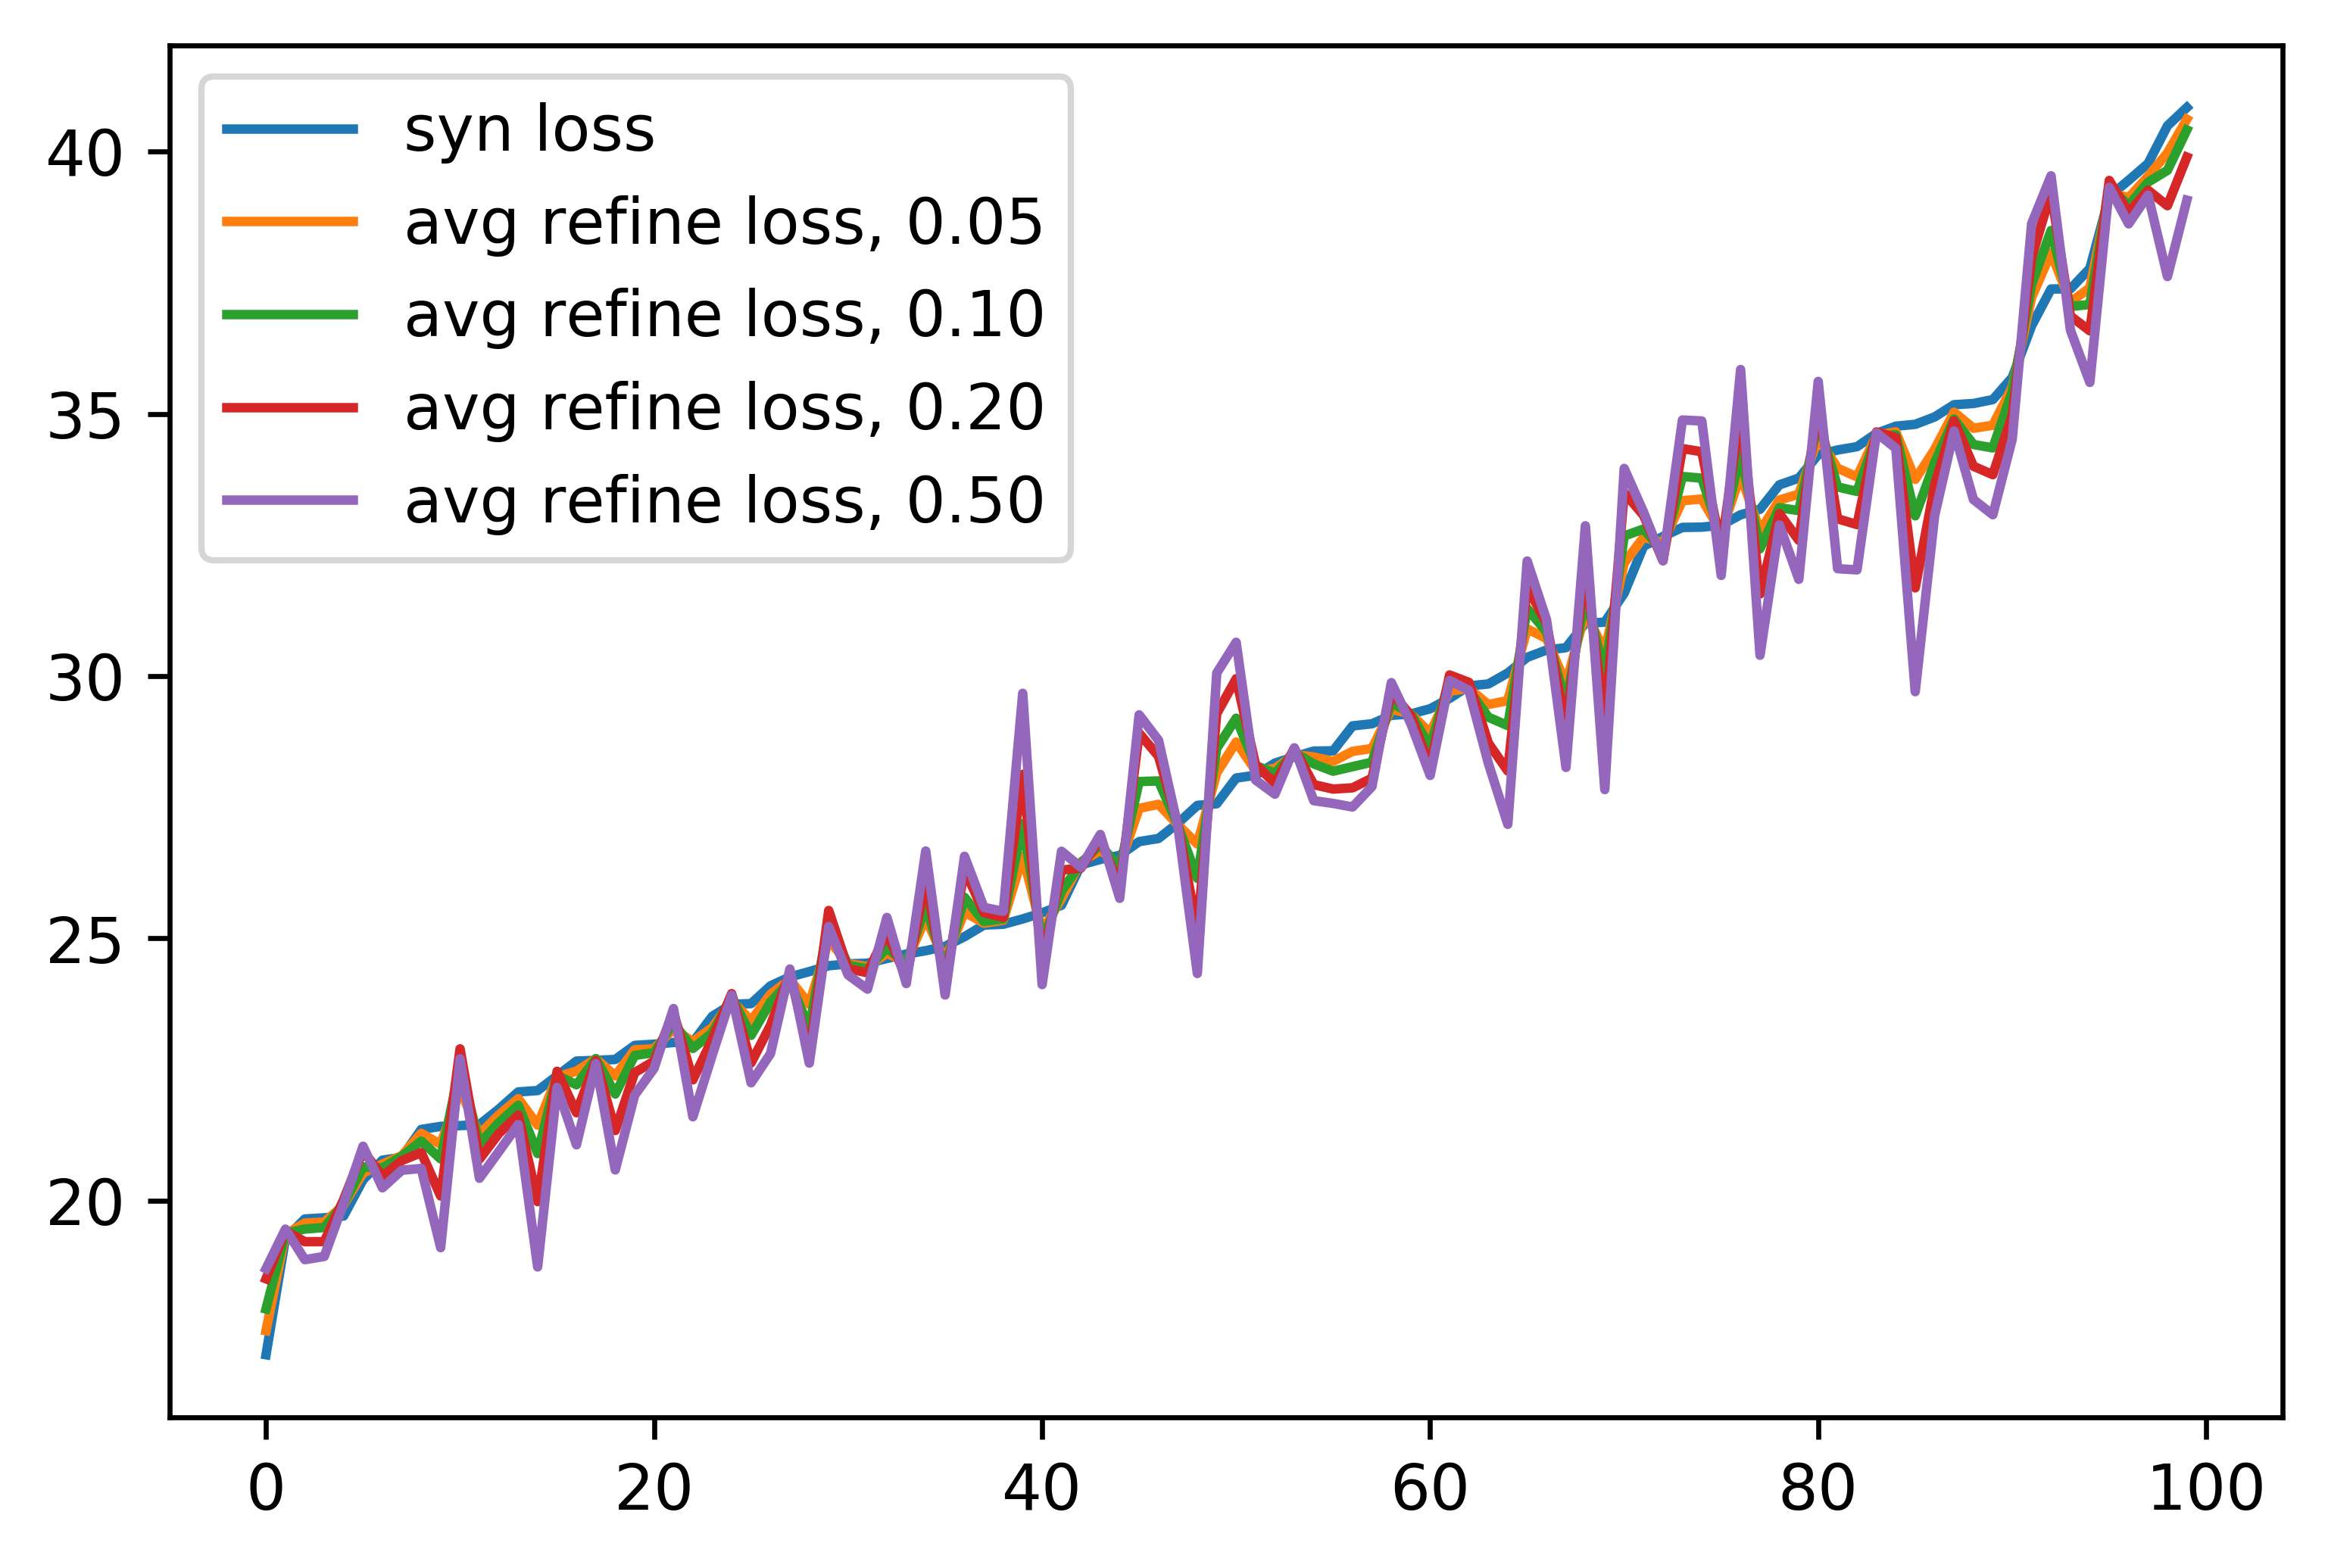

In [12]:
plt.plot(loss_5[0][np.argsort(loss_5[0])], label="syn loss")
plt.plot(loss_5[1][np.argsort(loss_5[0])], label="avg refine loss, 0.05")
plt.plot(loss_10[1][np.argsort(loss_5[0])], label="avg refine loss, 0.10")
plt.plot(loss_20[1][np.argsort(loss_5[0])], label="avg refine loss, 0.20")
plt.plot(loss_50[1][np.argsort(loss_5[0])], label="avg refine loss, 0.50")
#plt.plot(refine_info_loss[:100][np.argsort(syn_loss[:100])], label="info refine loss")
plt.legend()
plt.savefig("avg_refine_loss_diff_threshold.png")

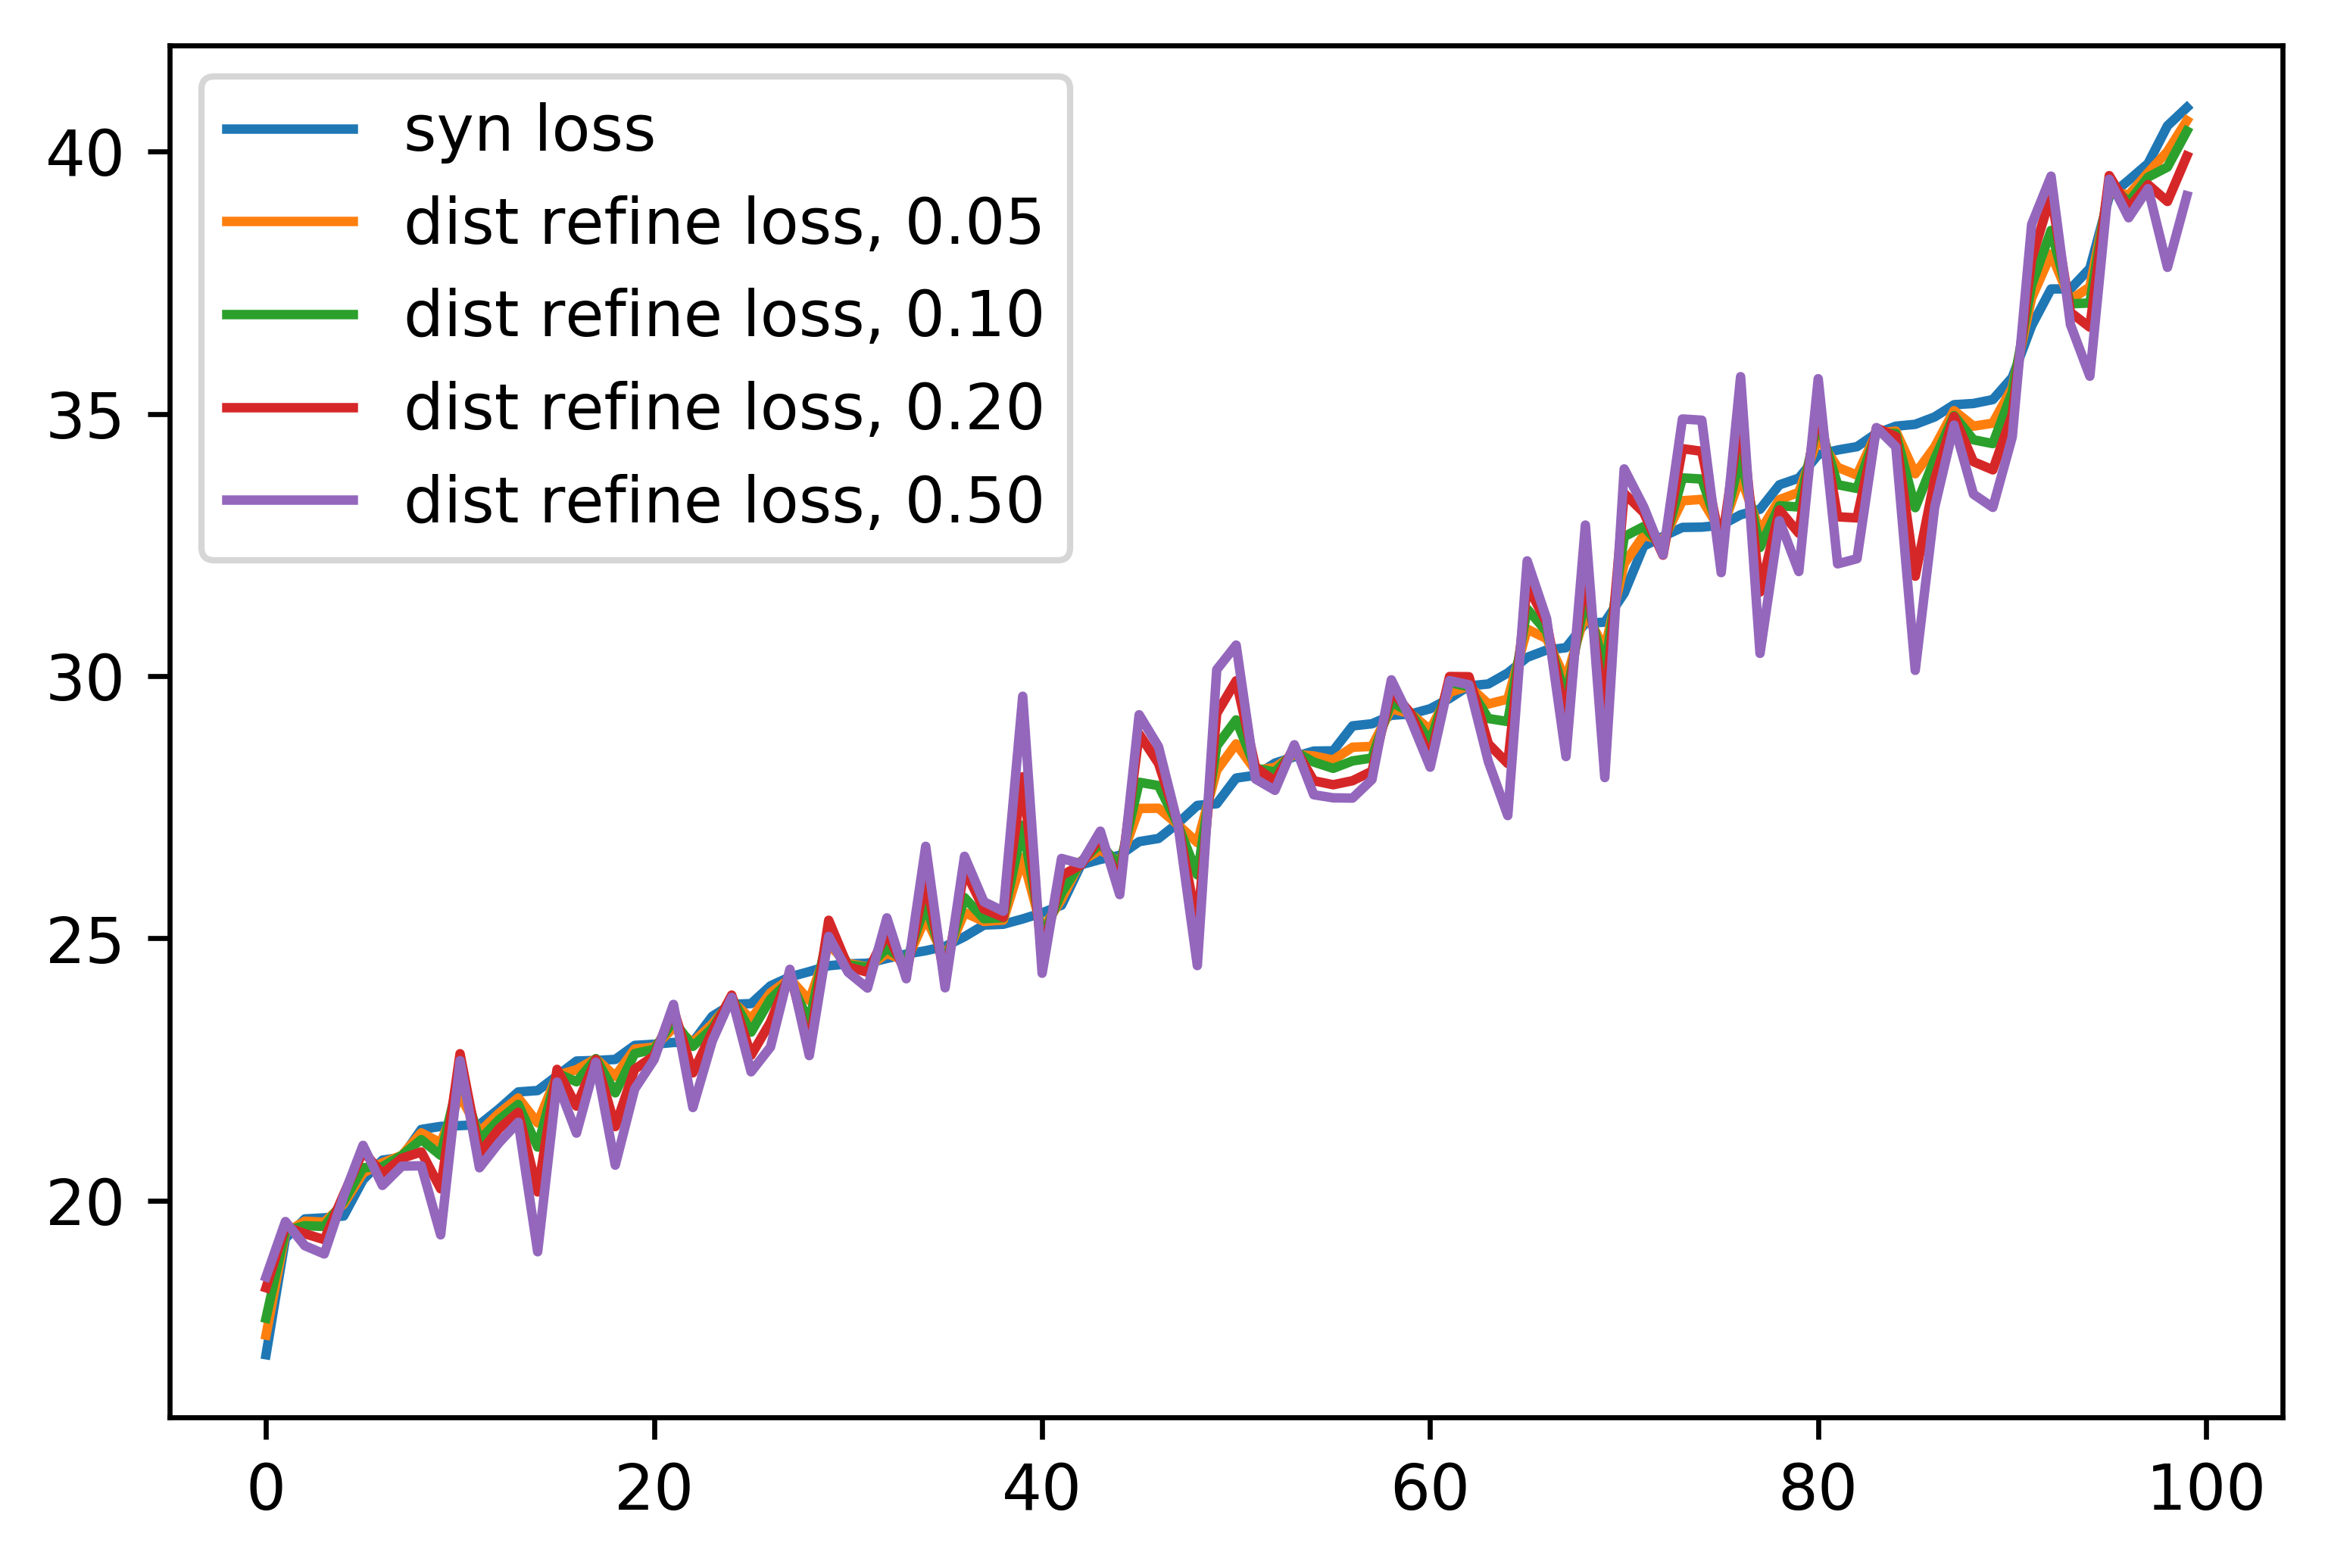

In [13]:
plt.plot(loss_5[0][np.argsort(loss_5[0])], label="syn loss")
plt.plot(loss_5[2][np.argsort(loss_5[0])], label="dist refine loss, 0.05")
plt.plot(loss_10[2][np.argsort(loss_5[0])], label="dist refine loss, 0.10")
plt.plot(loss_20[2][np.argsort(loss_5[0])], label="dist refine loss, 0.20")
plt.plot(loss_50[2][np.argsort(loss_5[0])], label="dist refine loss, 0.50")
#plt.plot(refine_info_loss[:100][np.argsort(syn_loss[:100])], label="info refine loss")
plt.legend()
plt.savefig("dist_refine_loss_diff_threshold.png")

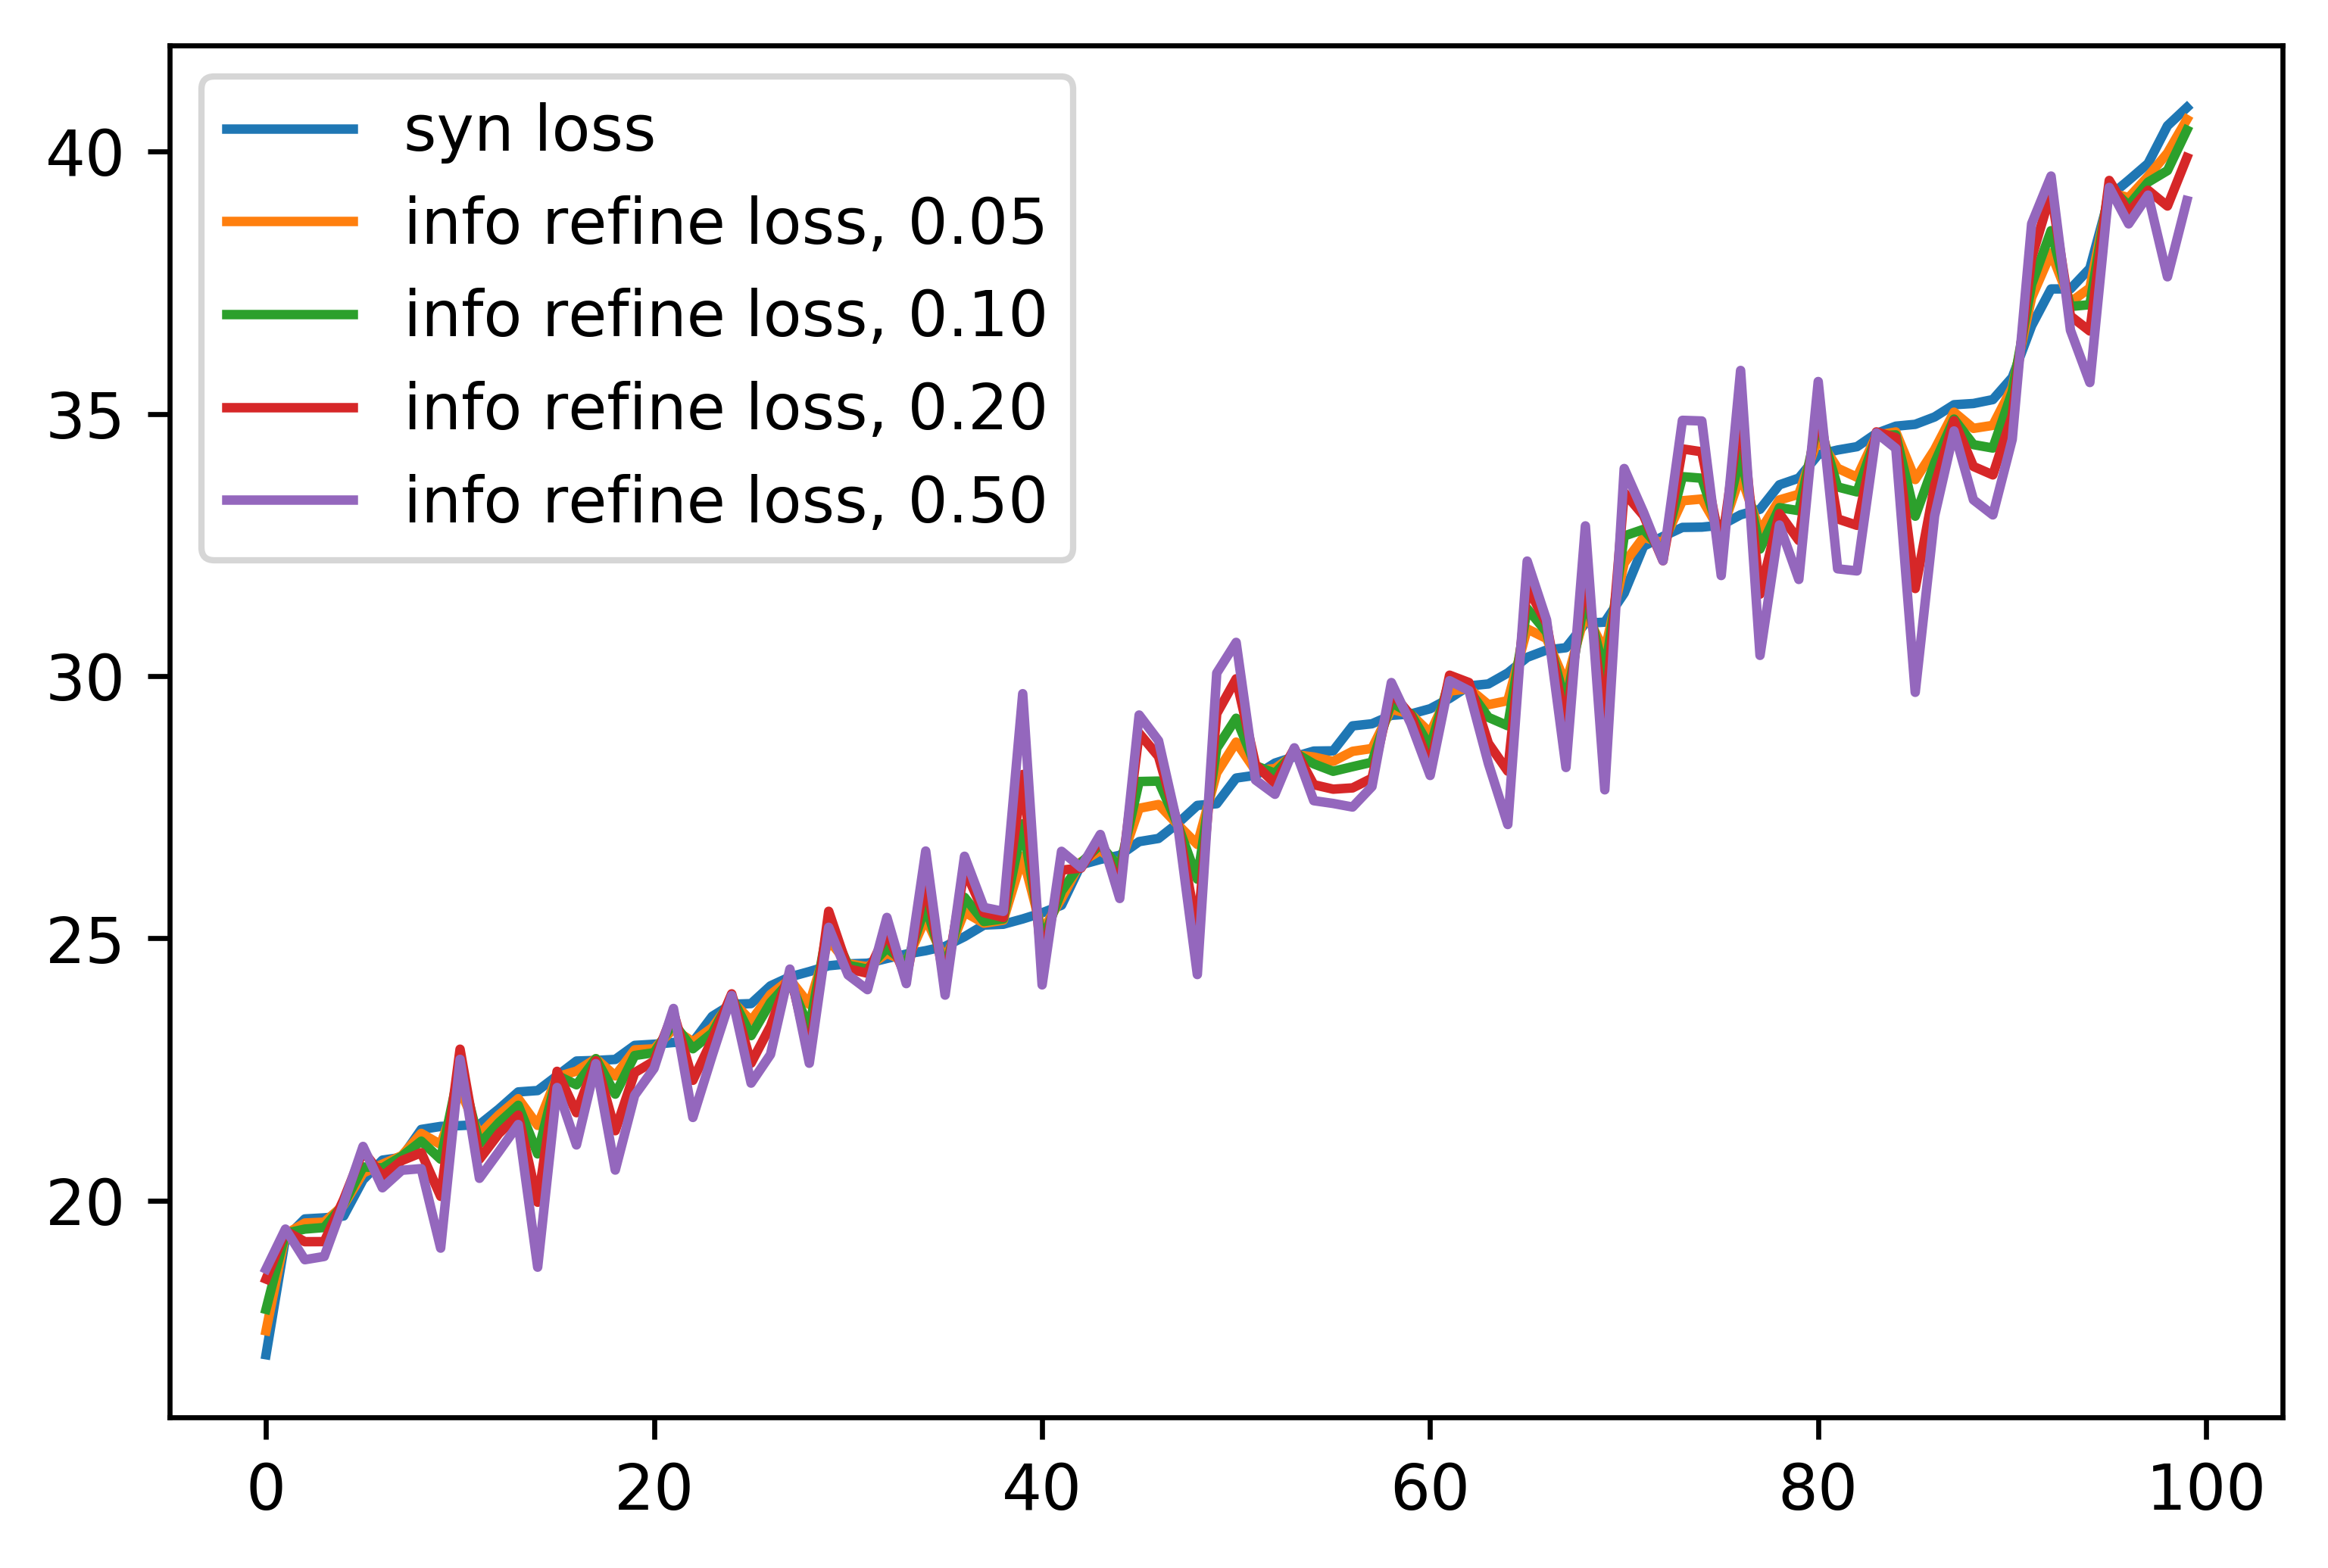

In [14]:
plt.plot(loss_5[0][np.argsort(loss_5[0])], label="syn loss")
plt.plot(loss_5[3][np.argsort(loss_5[0])], label="info refine loss, 0.05")
plt.plot(loss_10[3][np.argsort(loss_5[0])], label="info refine loss, 0.10")
plt.plot(loss_20[3][np.argsort(loss_5[0])], label="info refine loss, 0.20")
plt.plot(loss_50[3][np.argsort(loss_5[0])], label="info refine loss, 0.50")
#plt.plot(refine_info_loss[:100][np.argsort(syn_loss[:100])], label="info refine loss")
plt.legend()
plt.savefig("info_refine_loss_diff_threshold.png")

./rotate\model_name_0
./rotate\model_name_1000
./rotate\model_name_2000
./rotate\model_name_3000
./rotate\model_name_5000
./rotate\model_name_6000
./rotate\model_name_7000
./rotate\model_name_8000
./rotate\model_name_9000


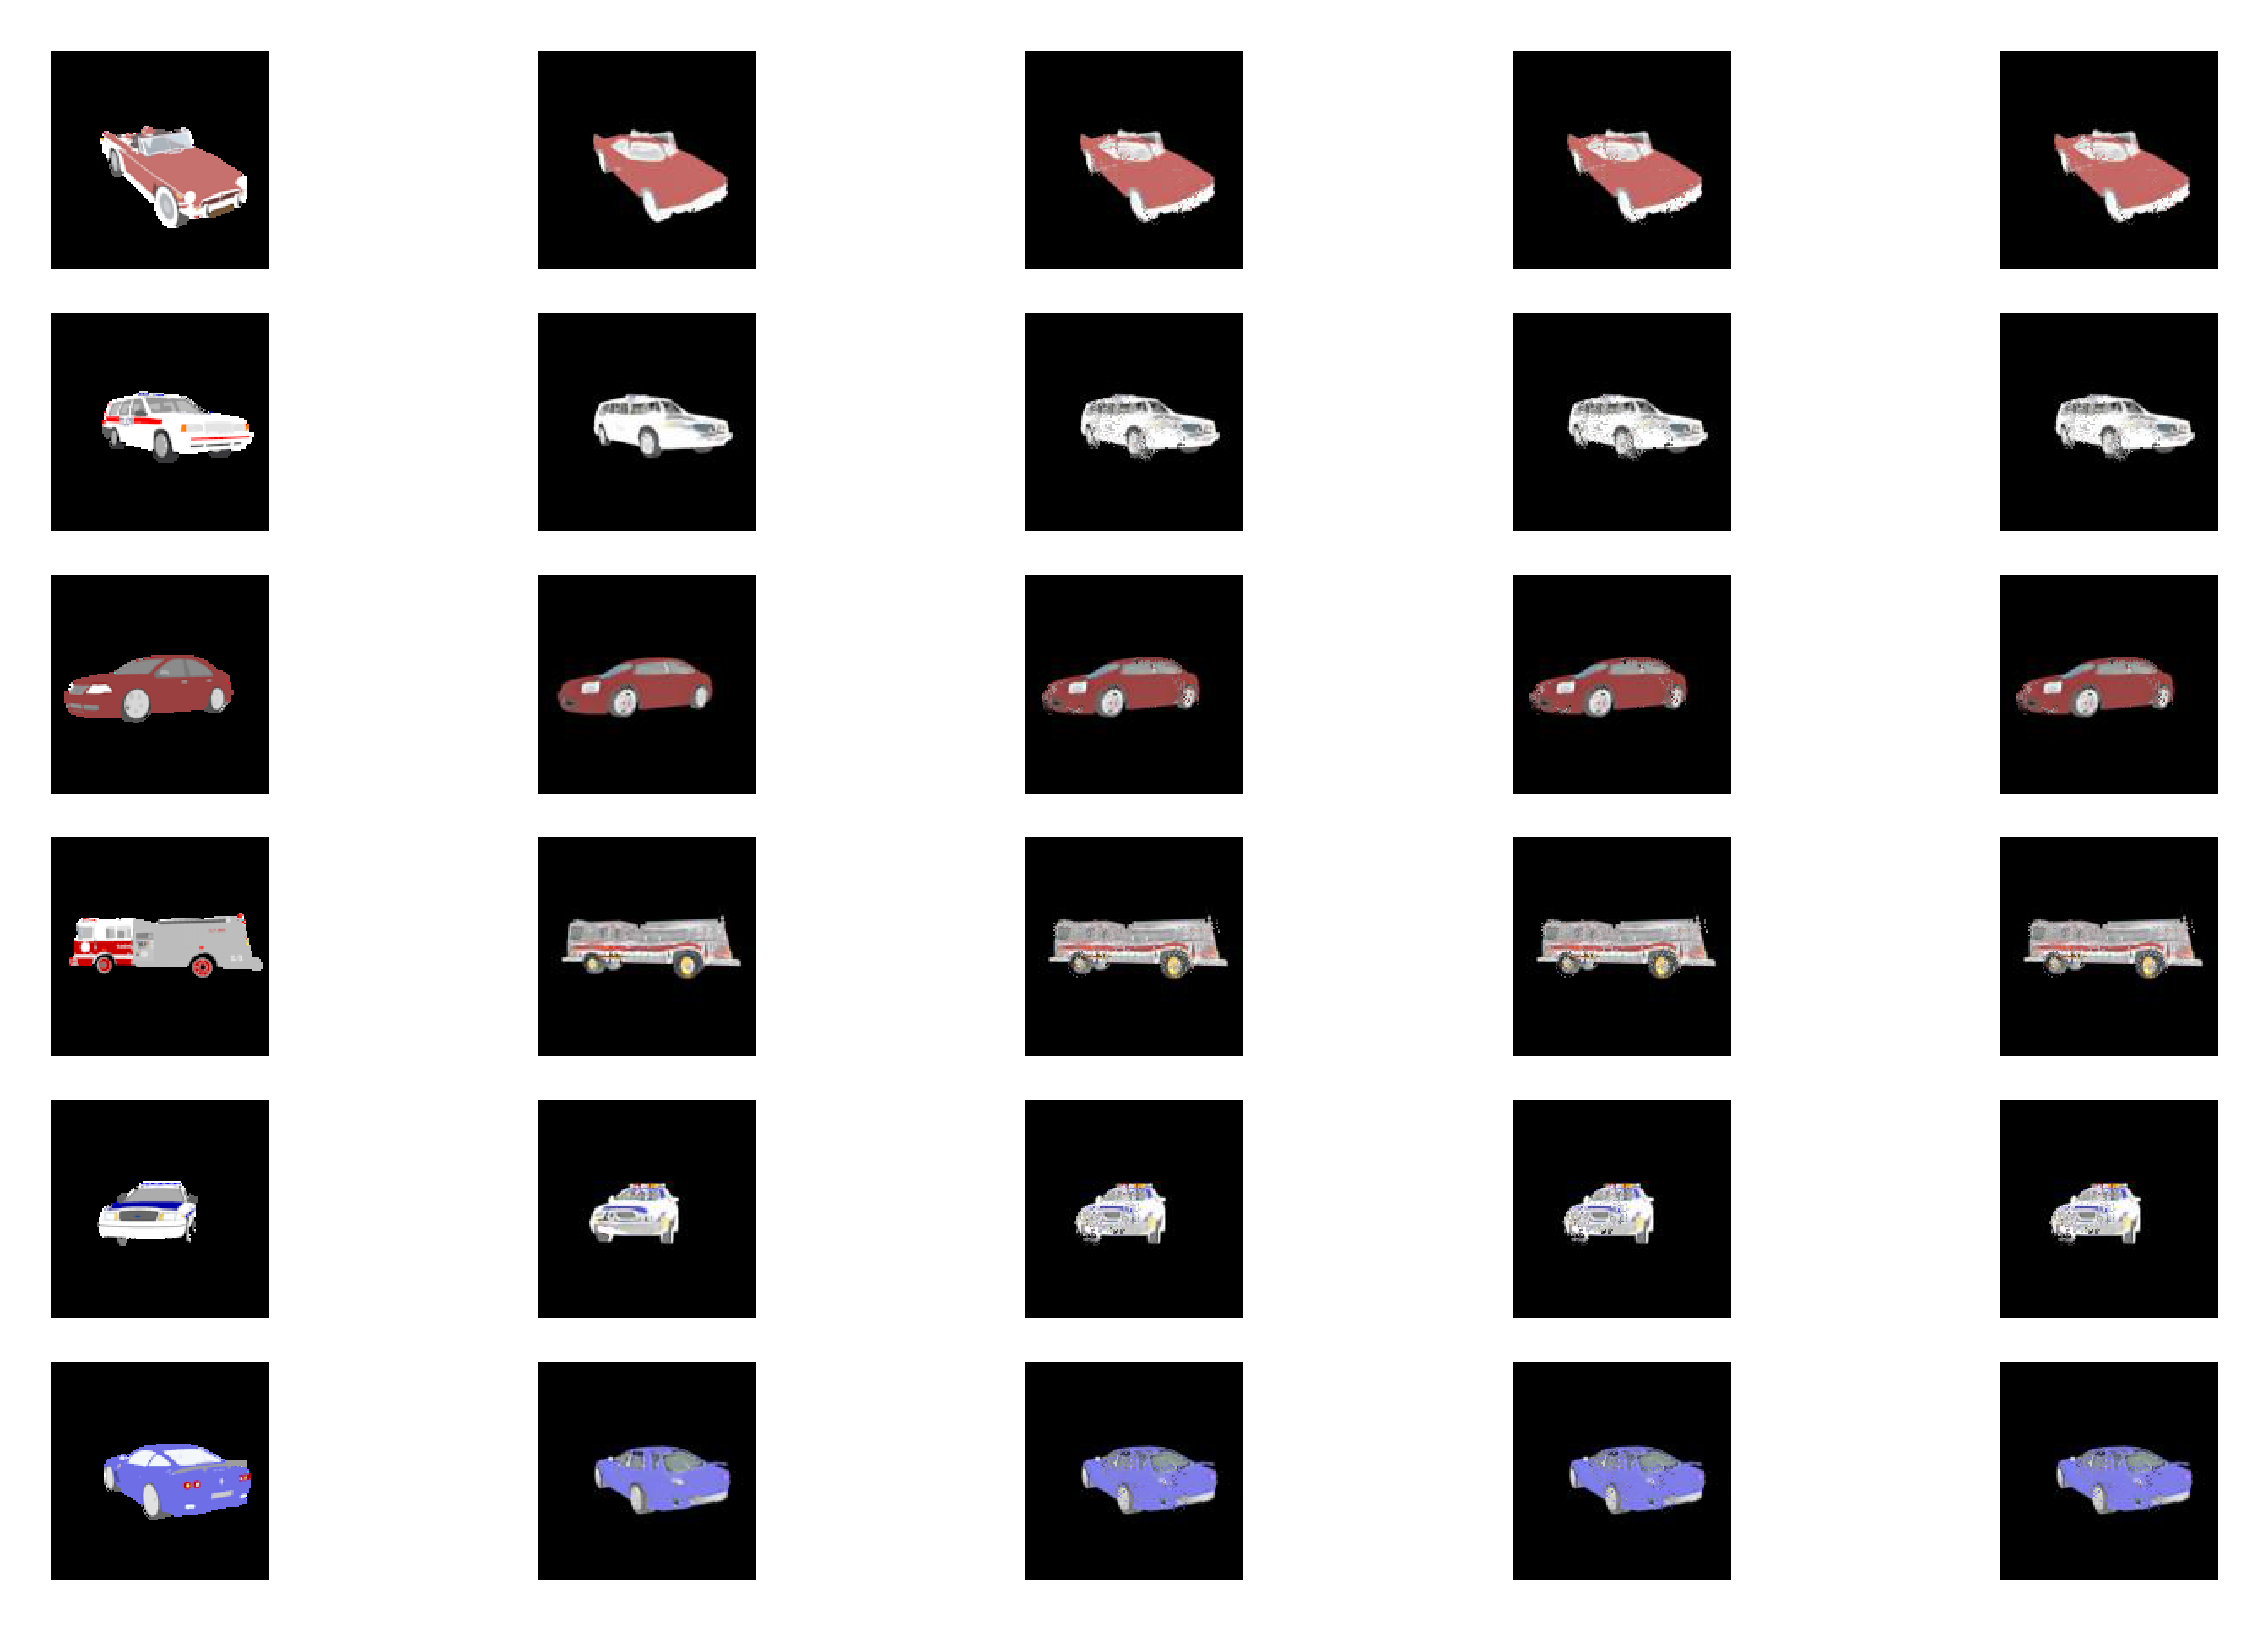

In [28]:
model_list = []
for file in os.listdir("./rotate"):
    if file.startswith("model_name_"):
        print(os.path.join("./rotate", file))
        with open(os.path.join("./rotate", file), "rb") as f:
            model_list_partial = pickle.load(f)
        for model in model_list_partial:
            model_list.append(model.split("/")[-2])
    #break

plt.rcParams['figure.dpi'] = 600
plt.rcParams['savefig.dpi'] = 600

def get_dist(a, b):
    aa = (a * np.array([180, 90]) + np.array([180, 0])) * np.pi / 180.
    bb = (b * np.array([180, 90]) + np.array([180, 0])) * np.pi / 180
    posa = np.array([np.cos(aa[1]) * np.sin(aa[0]), np.cos(aa[1]) * np.cos(aa[0]), np.sin(aa[1])])
    posb = np.array([np.cos(bb[1]) * np.sin(bb[0]), np.cos(bb[1]) * np.cos(bb[0]), np.sin(bb[1])])
    return np.linalg.norm(posa - posb)

root_path = "./"

vsmat = np.zeros(shape=[10, 3, 3, 18, 18])
for model_idx in range(10):
    file = pickle.load(open(root_path + 'vs_mat_' + str(model_idx), 'rb'))
    for log in file:
        #print(log)
        src_file = log[0][0]
        tgt_file = log[1][0]
        src_az = int(src_file.split('_')[-4])
        src_el = int(src_file.split('_')[-2])
        tgt_az = int(tgt_file.split('_')[-4])
        tgt_el = int(tgt_file.split('_')[-2])
        loss = log[2].item()
        #print(src_az, src_el, tgt_az, tgt_el, loss)
        vsmat[model_idx, int(src_el / 10), int(tgt_el / 10), int(src_az / 20), int(tgt_az / 20)] += loss
        
vsmat = np.sum(vsmat, axis=(0, 1, 3)) / 54

model_path = "C:\\Users\\AndrewHuang\\Documents\\GitHub\\02958343\\02958343"
fig, axs = plt.subplots(6, 5)# real, syn, avg refine, dist refine, info refine
for i in range(6):
    for j in range(5):
        axs[i, j].axis("off")
                   
for idx, model in enumerate(model_list):
    os.system("blender --background --python 3dloc_2dcoor.py -- --views 18 " + os.path.join(model_path, model, "model.obj"))
    with open("./vertex2pixel", "rb") as f:
        vertex2pixel = pickle.load(f)
    with open("./pixel2vertex", "rb") as f:
        pixel2vertex = pickle.load(f)
    vertex2color = OrderedDict()
    for az in range(18):
        for el in range(3):
            real_img_path = "C:\\tmp\\test\\" + model + "\\" + model + "_az_" + str(az * 20) + "_el_" + str(el * 10) + "_albedo.png0001.png"
            syn_img_path = "./rotate/rotate/" + str(idx * 1000 + az * 10 + el) + ".0.jpg"
            synimg = np.array(Image.open(syn_img_path))
            realimg = np.array(Image.open(real_img_path).convert("RGB"))
            for i in range(128):
                for j in range(128):
                    if pixel2vertex[az, el, i, j, 0] != 1234567.0:
                        if not repr(pixel2vertex[az, el, i, j, 1:]) in vertex2color:
                            vertex2color[repr(pixel2vertex[az, el, i, j, 1:])] = []
                        vertex2color[repr(pixel2vertex[az, el, i, j, 1:])].append(synimg[i, j])
    if True:
        if True:
            az = np.random.randint(0, 18)
            el = np.random.randint(0, 3)
            real_img_path = "C:\\tmp\\test\\" + model + "\\" + model + "_az_" + str(az * 20) + "_el_" + str(el * 10) + "_albedo.png0001.png"
            syn_img_path = "./rotate/rotate/" + str(idx * 1000 + az * 10 + el) + ".0.jpg"
            realimg = np.array(Image.open(real_img_path).convert("RGB"))
            synimg = np.array(Image.open(syn_img_path))
            
            avg_refined = np.copy(synimg)
            dist_refined = np.copy(synimg)
            info_refined = np.copy(synimg)
            for i in range(128):
                for j in range(128):
                    if pixel2vertex[az, el, i, j, 0] != 1234567.0:
                        candidate_pixel = np.mean(vertex2color[repr(pixel2vertex[az, el, i, j, 1:])], axis=0).astype(realimg.dtype)
                        avg_refined[i, j] = candidate_pixel
                        candidate_pixel = [0, 0, 0]
                        candidate_weight= 0.0
                        for color_vp in vertex2color[repr(pixel2vertex[az, el, i, j, 1:])]:
                            color = color_vp[:3]
                            dist = get_dist(color_vp[-2:], [az, el])
                            candidate_pixel += color * np.exp(-dist)
                            candidate_weight += np.exp(-dist)
                        dist_refined[i, j] = candidate_pixel / candidate_weight
                        candidate_pixel = [0, 0, 0]
                        candidate_weight= 0.0
                        for color_vp in vertex2color[repr(pixel2vertex[az, el, i, j, 1:])]:
                            color = color_vp[:3]
                            candidate_pixel += color * np.exp(-vsmat[el, az])
                            candidate_weight += np.exp(-vsmat[el, az])
                        info_refined[i, j] = candidate_pixel / candidate_weight

            axs[idx, 0].imshow(realimg)
            axs[idx, 1].imshow(synimg)
            axs[idx, 2].imshow(avg_refined)
            axs[idx, 3].imshow(dist_refined)
            axs[idx, 4].imshow(info_refined)
    if idx >= 5:
        break

In [29]:
fig.savefig("visual_raycast_threshold_5.png")